In [1]:
!pip install Pillow


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [2]:
import time
import requests
import json
import urllib


In [3]:
from googletrans import Translator
from utils import KarloAPI
from PIL import Image  # pip install Pillow

translator = Translator()

# [내 애플리케이션] > [앱 키] 에서 확인한 REST API 키 값 입력
REST_API_KEY = ''

karlo = KarloAPI(rest_api_key=REST_API_KEY)

번역: A White cat
{'id': 'f633fcf239d05a4c', 'model_version': 'v2.0.4.0.prod', 'images': [{'id': 'a2FybG8tdHJpdG9uLTg2OWM4OTQ5Yi01cGp3Yw==-dd4557a3-e711-4c93-9f4a-3e30d352c3be', 'image': 'https://mk.kakaocdn.net/dna/karlo/image/2024-02-16/11/dd4557a3-e711-4c93-9f4a-3e30d352c3be.jpeg?credential=smxRqiqUEJBVgohptvfXS5JoYeFv4Xxa&expires=1708049949&signature=RTOcSJaCfALnecXgWhjEibOF%2BC4%3D', 'seed': 2621682896, 'nsfw_content_detected': None, 'nsfw_score': None}]}

=이미지 URL
https://mk.kakaocdn.net/dna/karlo/image/2024-02-16/11/dd4557a3-e711-4c93-9f4a-3e30d352c3be.jpeg?credential=smxRqiqUEJBVgohptvfXS5JoYeFv4Xxa&expires=1708049949&signature=RTOcSJaCfALnecXgWhjEibOF%2BC4%3D



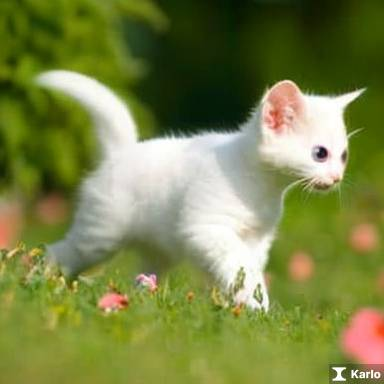

time:5.43


In [4]:
start_time = time.time()

# 프롬프트에 사용할 제시어
query = "a white cat"
negative_prompt = "sleeping cat, dog, human, ugly face, cropped"

# 입력된 쿼리를 영문으로 번역
res = translator.translate(text=query, src='ko', dest='en')
prompt = res.text.strip('"')

print(f'번역: {prompt}')
# 이미지 생성하기 REST API 호출
response = karlo.text2image(prompt=prompt, negative_prompt=negative_prompt)

print(response)
print()

print(f'=이미지 URL')
print(response['images'][0]['image'])
print()

# 응답의 첫 번째 이미지 생성 결과 출력하기
result = Image.open(urllib.request.urlopen(response.get("images")[0].get("image")))
result.show()

# 소요된 시간을 계산합니다.
end_time = time.time()
formatted_elapsed_time = "{:.2f}".format(end_time - start_time)
print(f'time:{formatted_elapsed_time}')